## Без нормализации

Спектры_Лаба/0.075a.csv
221.31611128095383


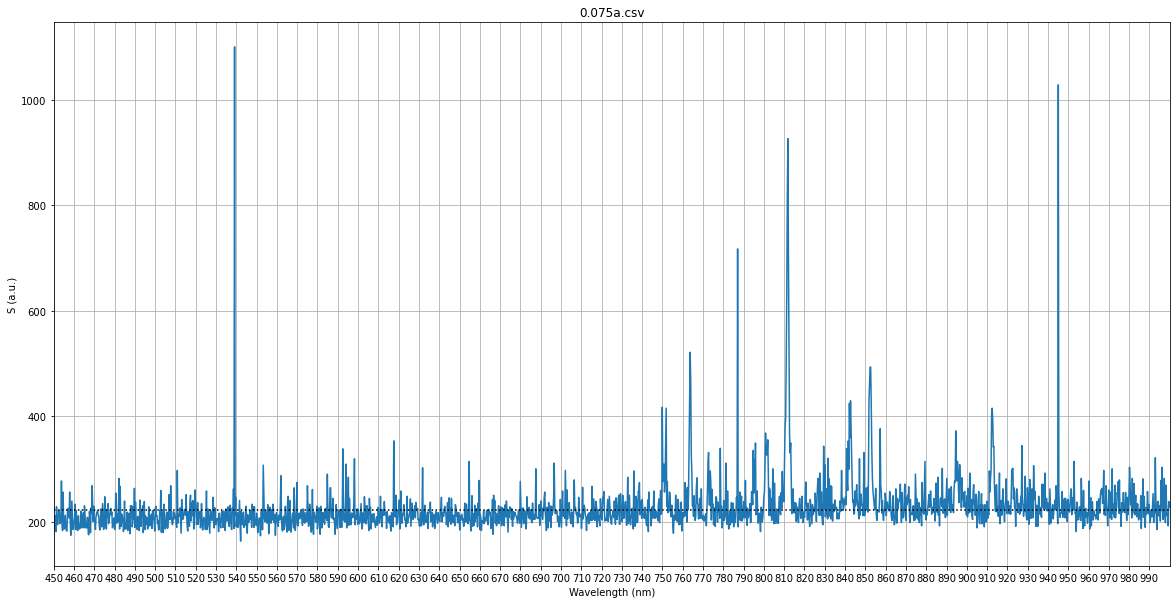

Спектры_Лаба/0.1a.csv
223.32986854173035


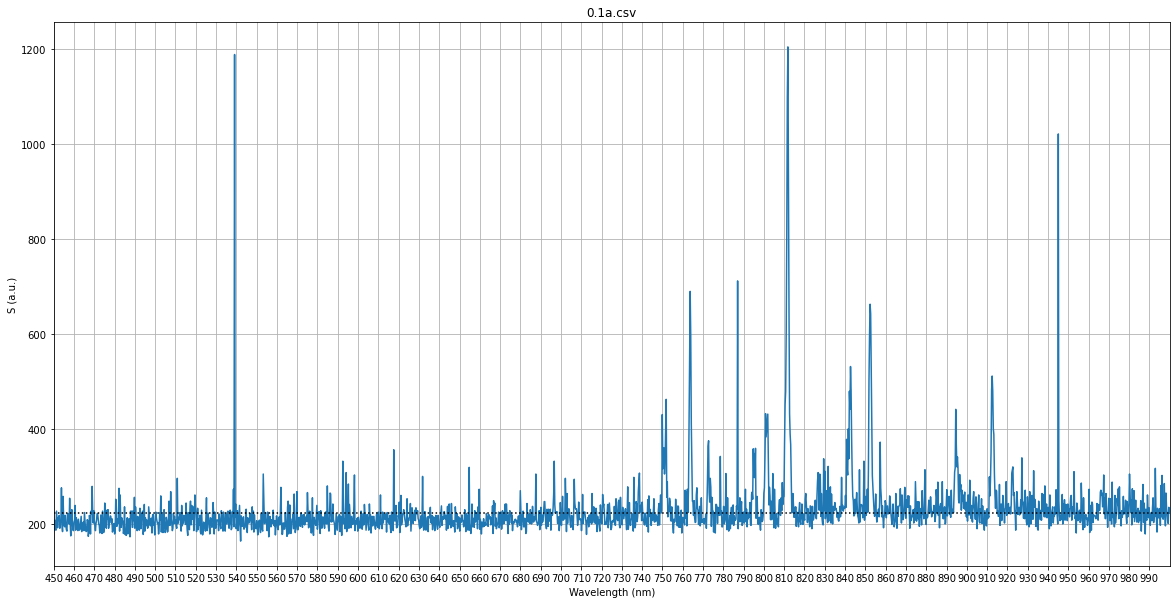

Спектры_Лаба/0.125a.csv
182.63527973096913


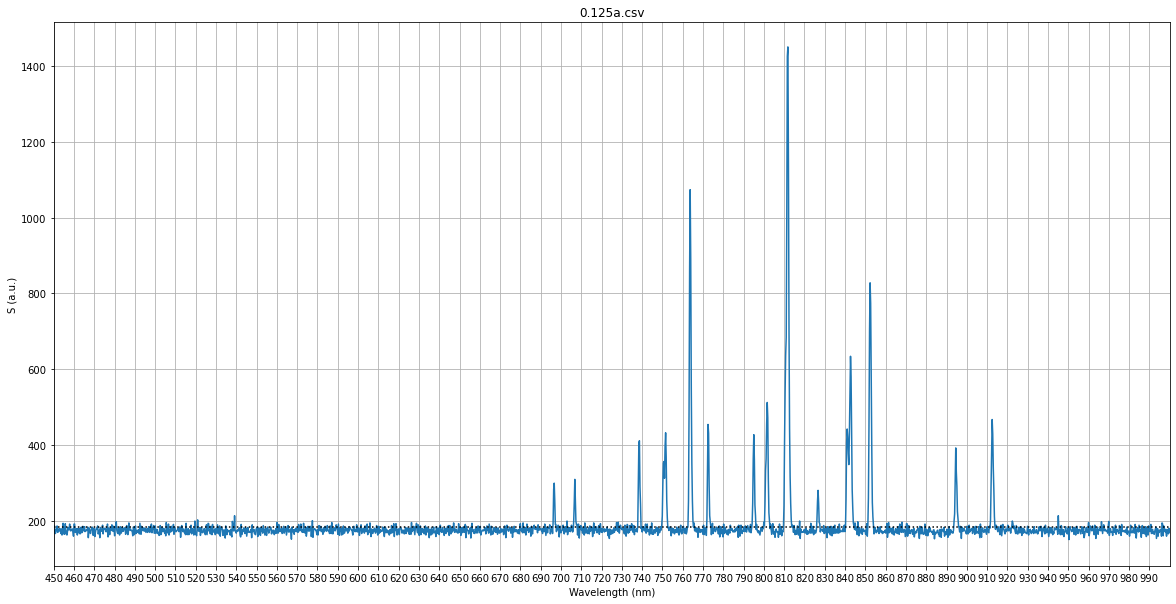

Спектры_Лаба/0.15a.csv
185.11953531030267


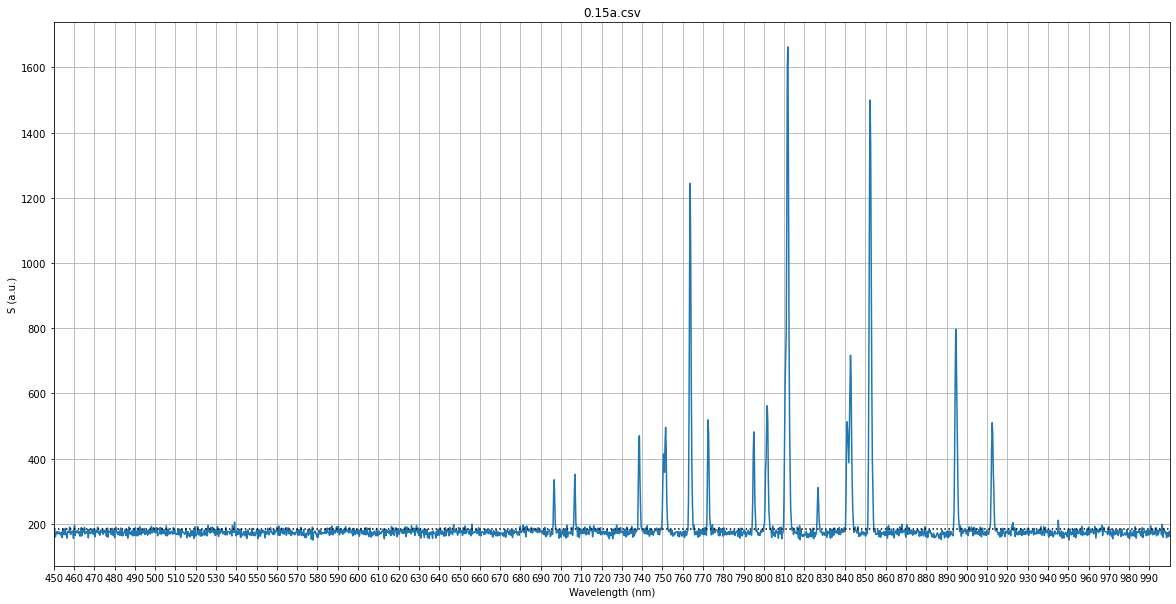

Спектры_Лаба/0.175a.csv
231.23448486701315


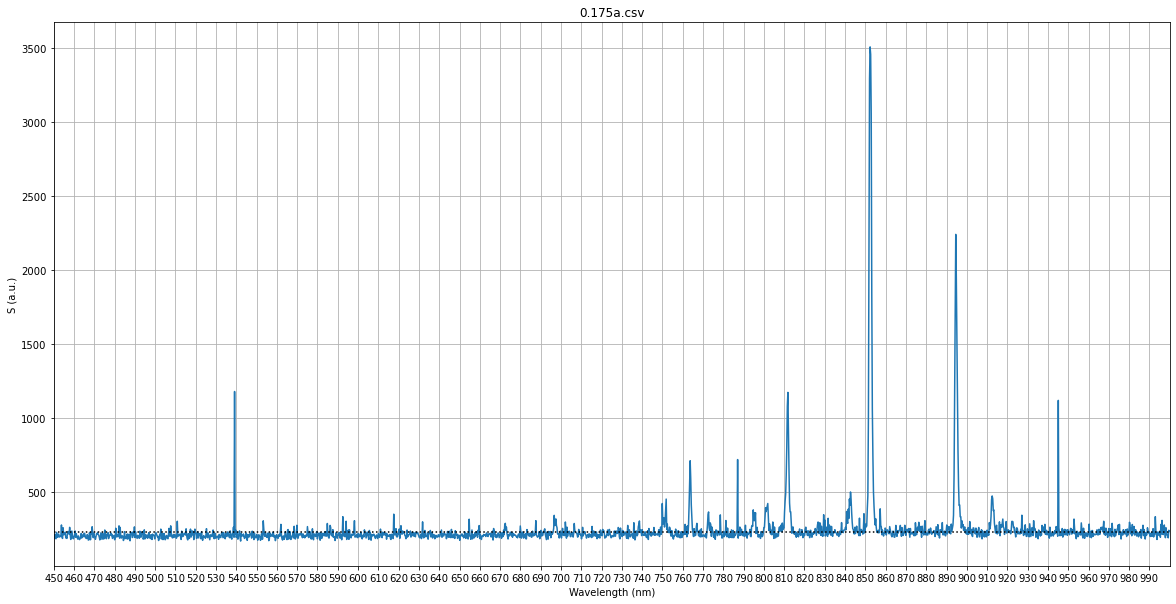

Спектры_Лаба/0.2a.csv
190.3995719963314


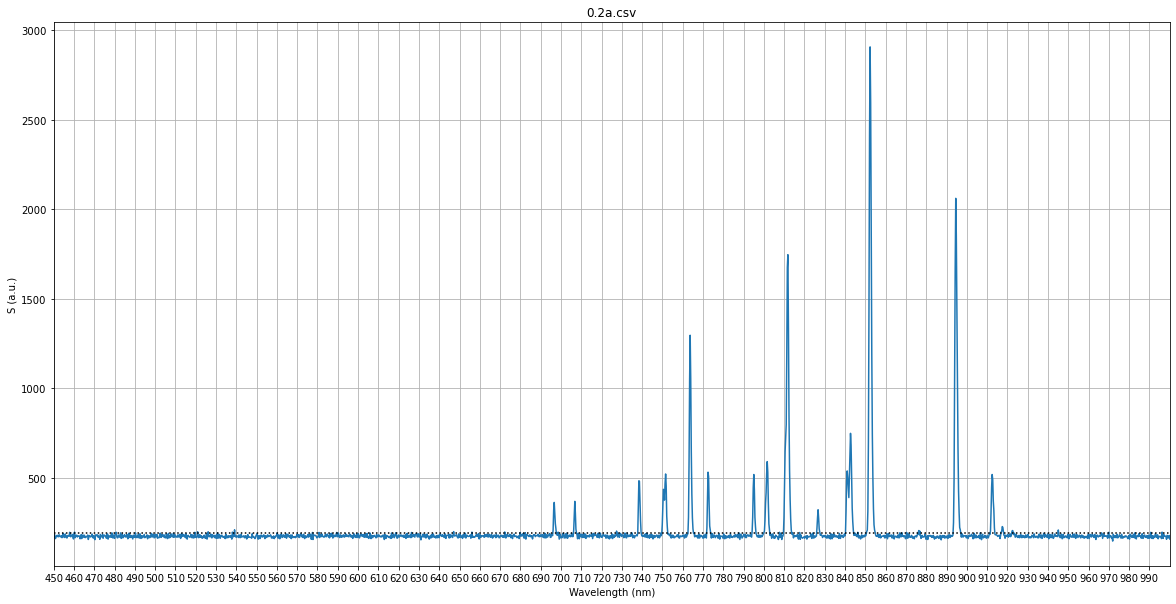

Спектры_Лаба/0.25a.csv
192.3751146438398


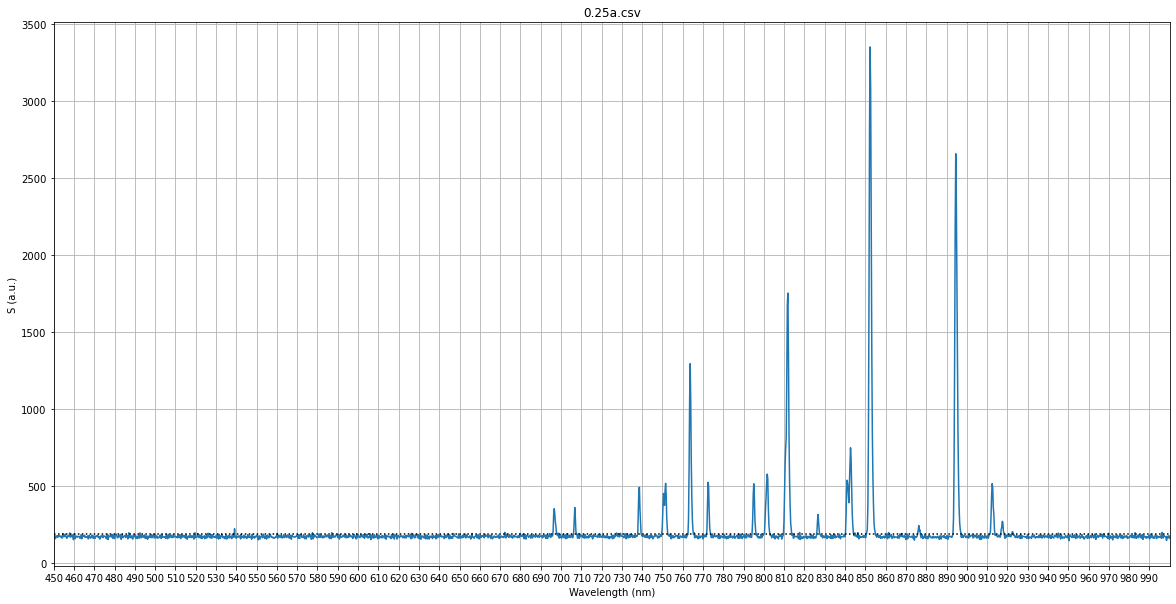

Спектры_Лаба/0.27a.csv
192.96239682054417


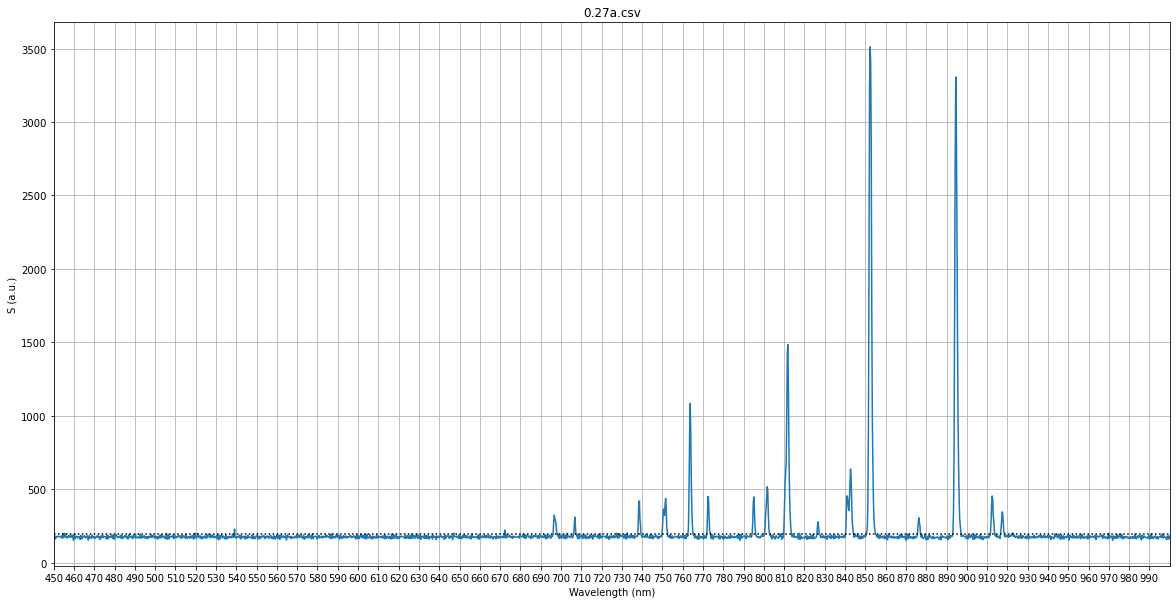

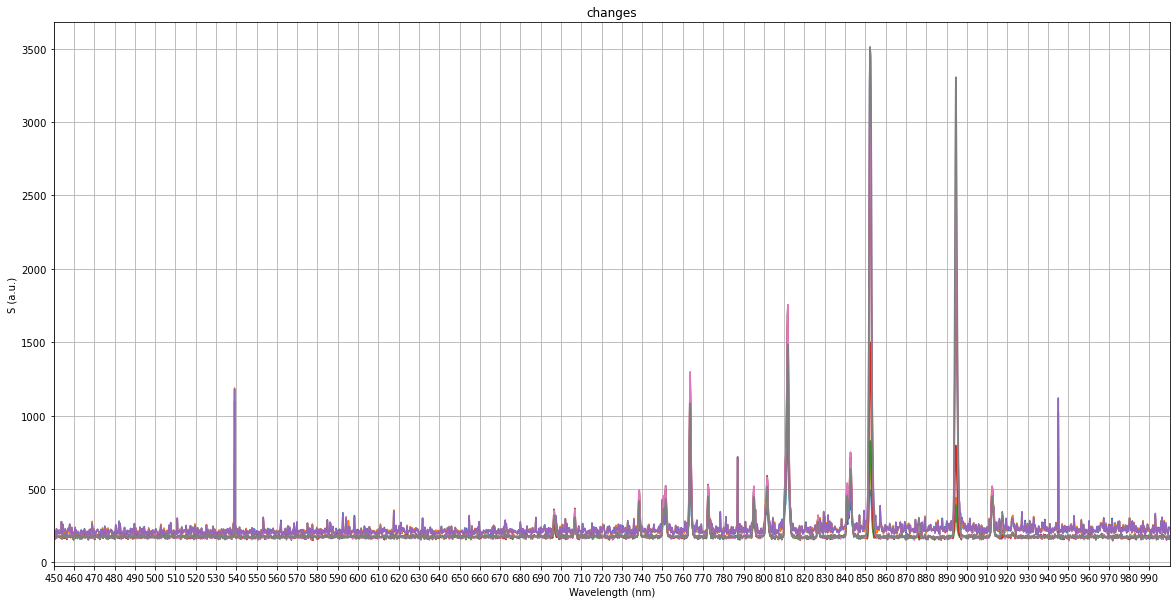

In [33]:
#импорт библиотек для работы
import numpy as np
from matplotlib import pyplot as plt
#files = ['1.DAT', '2.DAT', 'izm 1.DAT', 'izm 2.DAT', 'izm 3.DAT', 'izm 4.DAT', 'izm 5.DAT']
files = ['0.075a.csv', '0.1a.csv', '0.125a.csv', '0.15a.csv', '0.175a.csv', '0.2a.csv', '0.25a.csv', '0.27a.csv']
#открываем файл
waves_changes = []
maxes = []
for file in files:
    
    data = [] #сюда читаем вообще все из файла
    X = []    #здесь будут значения X
    Y = []  #а здесь Y
    print('Спектры_Лаба/' + file)
    with open('Спектры_Лаба/' + file,'r') as f:
        #читаем каждую строку
        for line in f:
            #и в строке слово
            line = line.replace('",', " ")
            line = line.replace('"', '')
            line = line.replace(',', '.')
            i = 0
            l1 = 0
            l2 = 0
            for word in line.split():
                # по очереди записываем в массивы.
                if i == 0:
                    l1 = float(word)
                    i+=1
                else:
                    l2 = float(word)
                    i-=1
                    
            if l1 != 0 and l2 != 0:
                
                #l2 = l2 / G[np.where(x>l1)[0][0]]
                
                X.append(l1+4.8)
                Y.append(l2)
            
    #строим график и закрываем файл
    #X = X[700:1400]
    #Y = Y[700:1400]
    
    plt.figure(figsize=(20,10))
    
    
    plt.plot(X, Y)
    plt.grid(True)
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('S (a.u.)')
    plt.title(file)
    plt.xlim(500,1000)
    plt.xticks(np.arange(450, 1000, 10))
    #plt.yticks(np.arange(0, 1, 0.1))
    avr = np.average(Y)
    print(avr)
    plt.axhline(y = avr, color='k', linestyle='dotted')
    plt.savefig(file + '.png') 
    plt.show()
    f.close()
    waves_changes.append(Y)

    
    
    
plt.figure(figsize=(20,10))        
for spectr in waves_changes:
    plt.plot(X, spectr)
plt.grid(True)
plt.xlabel('Wavelength (nm)')
plt.ylabel('S (a.u.)')
plt.title("changes")
plt.xlim(500,1000)
plt.xticks(np.arange(450, 1000, 10))
plt.savefig("spectr" + '.png') 
plt.show()

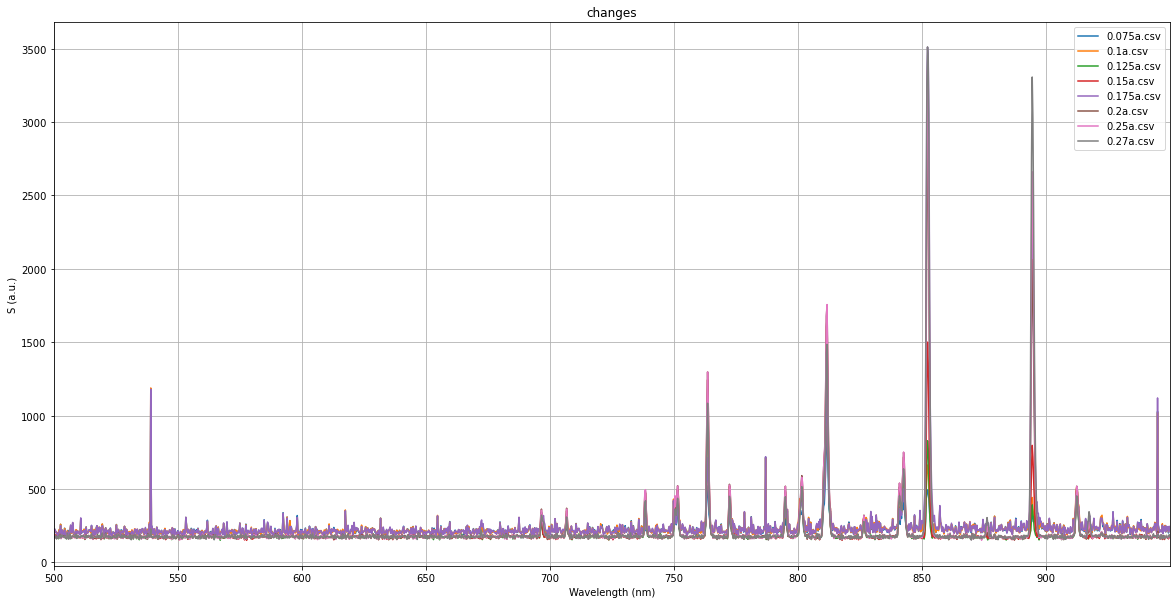

In [34]:


i = 0
plt.figure(figsize=(20,10))        
for spectr in waves_changes:
    plt.plot(X, spectr, label = files[i])
    i+=1
plt.grid(True)
plt.legend()
plt.xlabel('Wavelength (nm)')
plt.ylabel('S (a.u.)')
plt.title("changes")
lim1 = 500
lim2 = 950
plt.xlim(lim1,lim2)
plt.xticks(np.arange(lim1, lim2, 50))
plt.savefig("spectr" + '.png') 
plt.show()

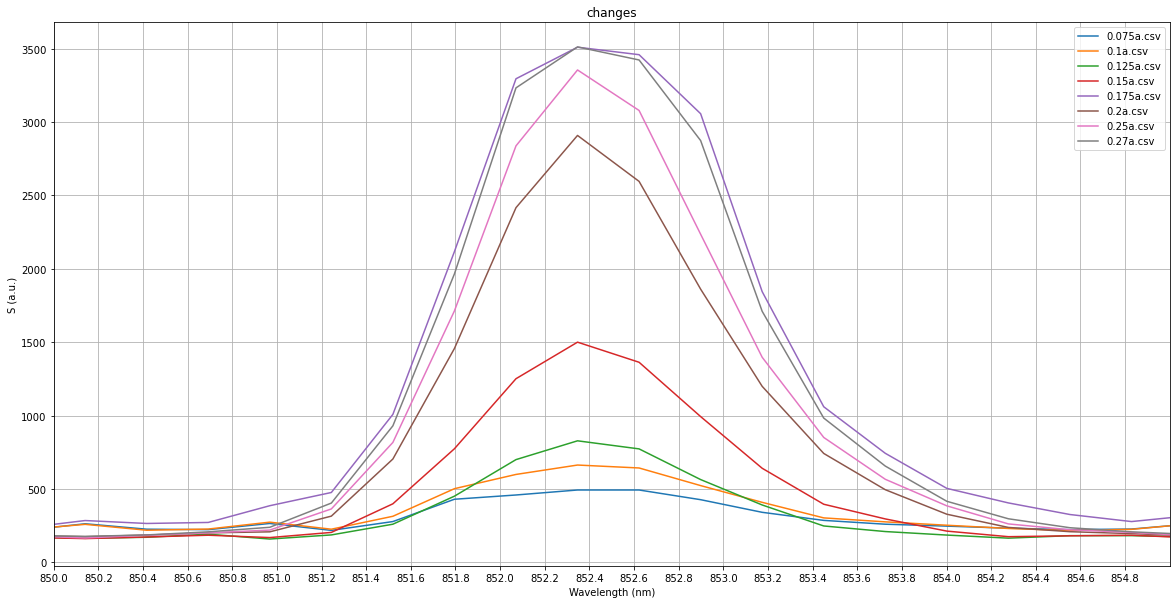

In [35]:
i = 0
plt.figure(figsize=(20,10))        
for spectr in waves_changes:
    plt.plot(X, spectr, label = files[i])
    i+=1
plt.grid(True)
plt.legend()
plt.xlabel('Wavelength (nm)')
plt.ylabel('S (a.u.)')
plt.title("changes")
lim1 = 850
lim2 = 855
plt.xlim(lim1,lim2)
plt.xticks(np.arange(lim1, lim2, 0.2))
plt.savefig("spectr" + '.png') 
plt.show()

In [83]:
N = np.array(X)
np.where((X>758.8)*(X<759))

(array([2070], dtype=int64),)

In [36]:
lines = [2070, 2245, 2392, 2545]

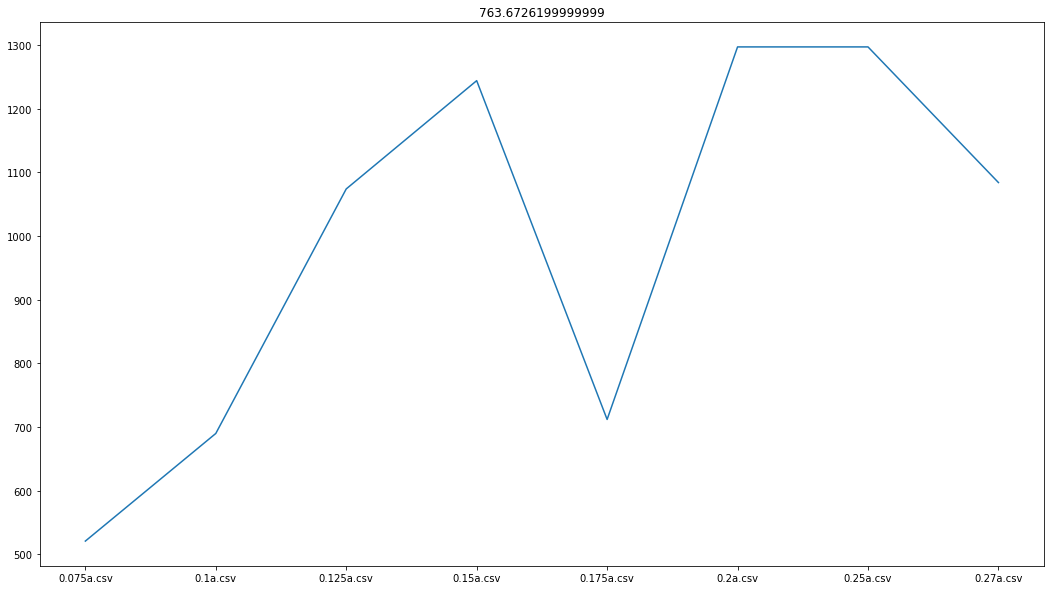

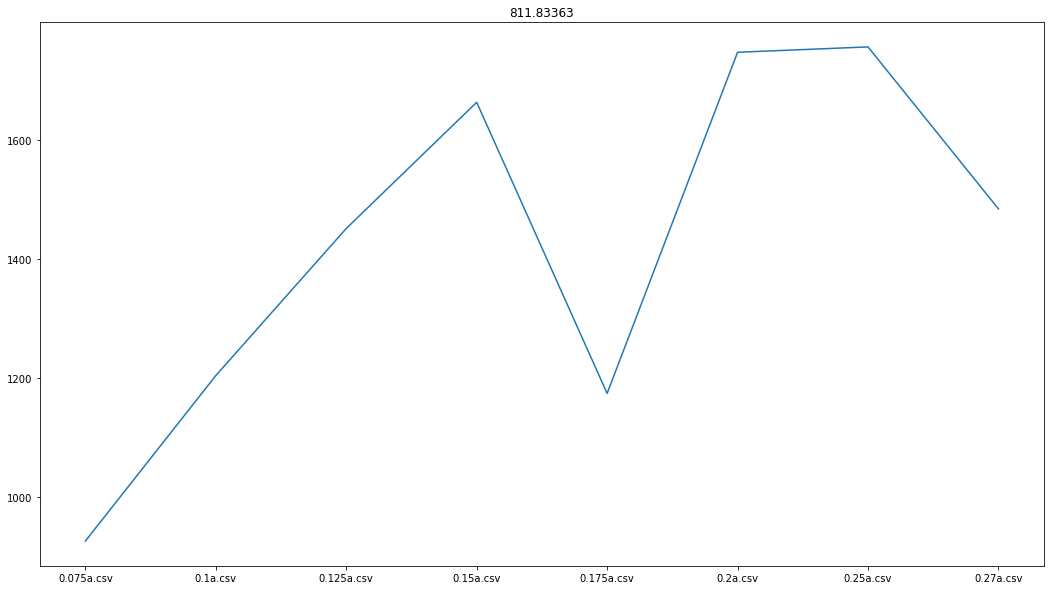

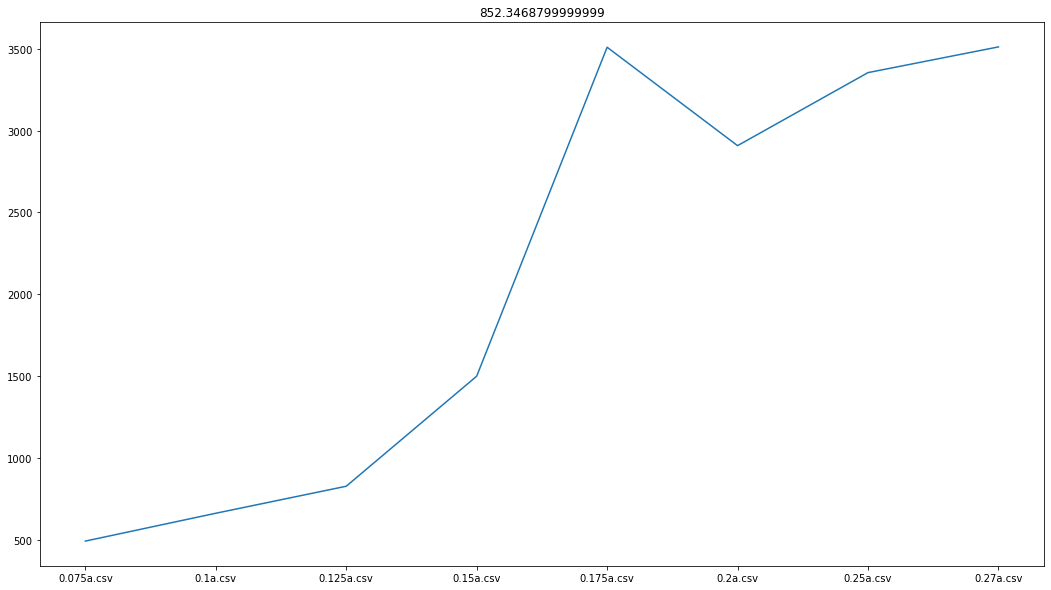

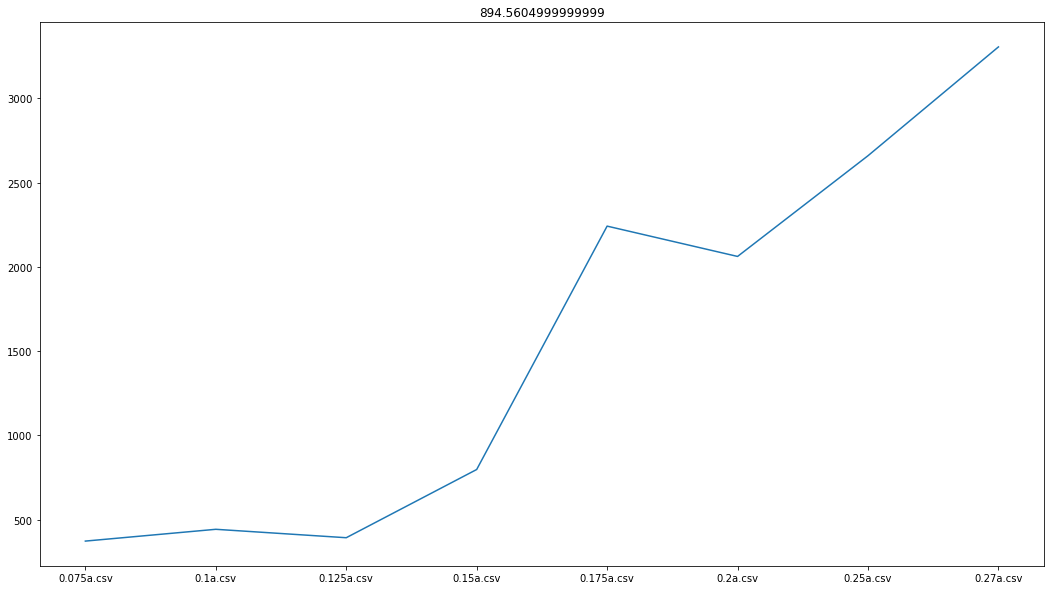

In [37]:
for i in lines:
    line = []
    for spectr in waves_changes:
        line.append(spectr[i])
    
    plt.figure(figsize=(18,10))  
    plt.plot(files, line)
    plt.title(X[i])
    plt.show()

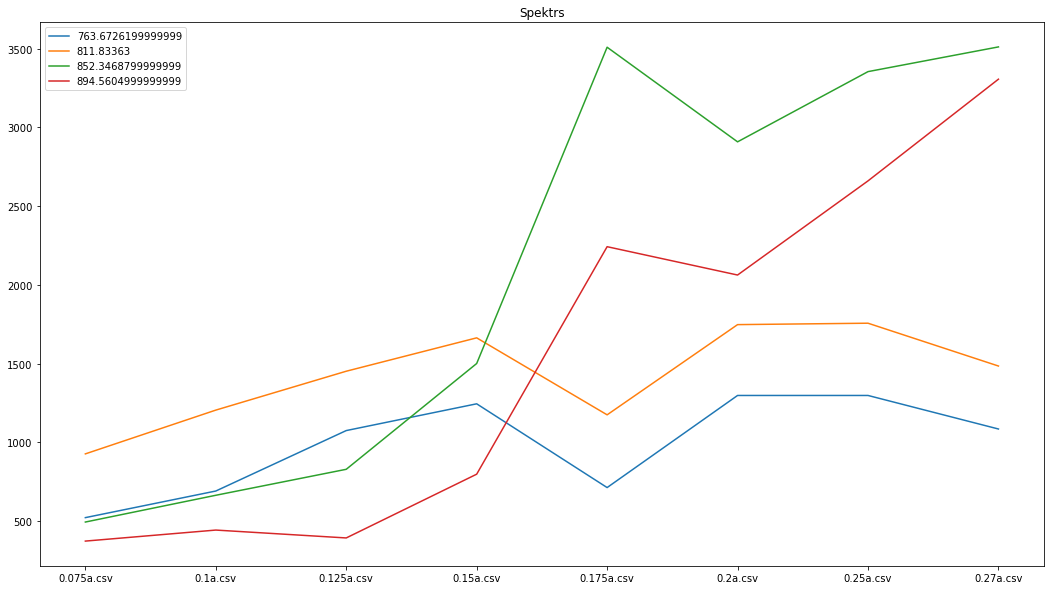

In [38]:

plt.figure(figsize=(18,10))  
for i in lines:
    line = []
    for spectr in waves_changes:
        line.append(spectr[i])
    
    plt.plot(files, line, label=X[i])
plt.title("Spektrs")
plt.legend()
plt.show()

## Нормализция

Спектры_Лаба/normalisation_curve.csv


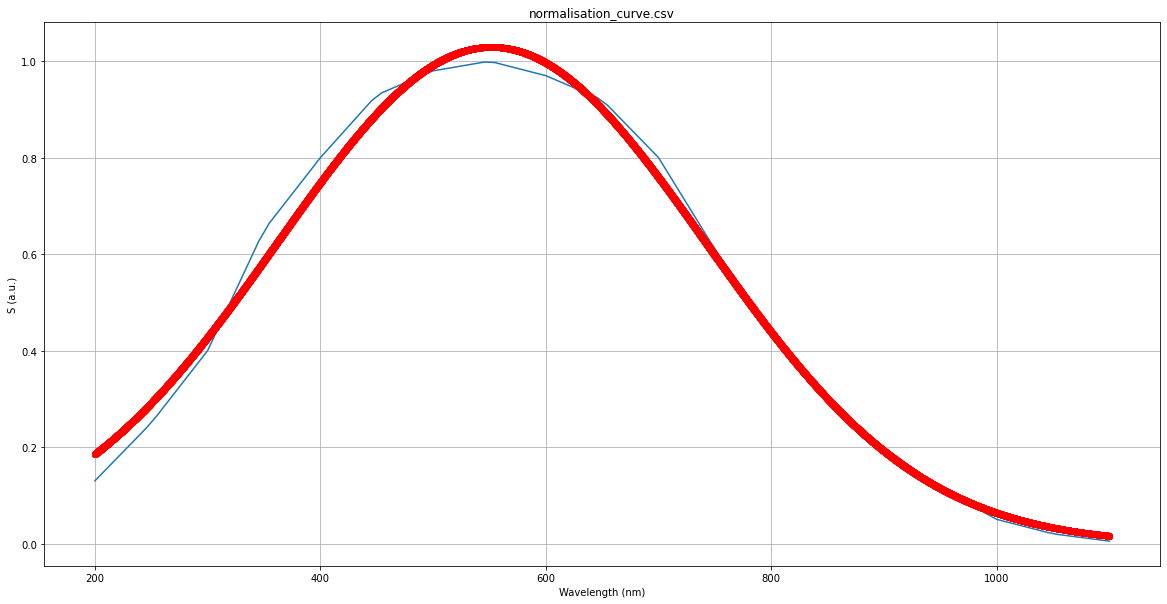

In [12]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
#files = ['1.DAT', '2.DAT', 'izm 1.DAT', 'izm 2.DAT', 'izm 3.DAT', 'izm 4.DAT', 'izm 5.DAT']
file = 'normalisation_curve.csv'
waves_changes = []
maxes = []

def gaus(x, a, x0,sigma):
    return a * np.exp(-(x-x0)**2 / (2 * sigma**2))

data = [] #сюда читаем вообще все из файла
X = []    #здесь будут значения X
Y = []  #а здесь Y
print('Спектры_Лаба/' + file)
with open('Спектры_Лаба/' + file,'r') as f:
    #читаем каждую строку
    for line in f:
        #и в строке слово
        line = line.replace(';', " ")
        line = line.replace(',', '.')
        i = 0
        l1 = 0
        l2 = 0
        for word in line.split():
            # по очереди записываем в массивы.
            if i == 0:
                l1 = float(word)
                i+=1
            else:
                l2 = float(word)
                i-=1

        if l1 != 0 and l2 != 0:    
            X.append(l1)
            Y.append(l2)

#строим график и закрываем файл
#X = X[700:1400]
#Y = Y[700:1400]
plt.figure(figsize=(20,10))
plt.plot(X, Y)
plt.grid(True)
plt.xlabel('Wavelength (nm)')
plt.ylabel('S (a.u.)')
plt.title(file)
f.close()
x = np.array(X)
y = np.array(Y)
y = y - (np.min(y))
n = len(x)
mean = sum(x * y) / sum(y)
sigma = np.sqrt(sum(y * (x - mean)**2) / sum(y))



popt, pcov = curve_fit(gaus, x, y, p0=[max(y), mean, sigma])

x = np.linspace(200, 1100, 10000)
G = gaus(x,*popt)
plt.plot(x,G,'ro:',label='gauss fit')
plt.show()

    
    

Спектры_Лаба/0.075a.csv
1251.7554649100753


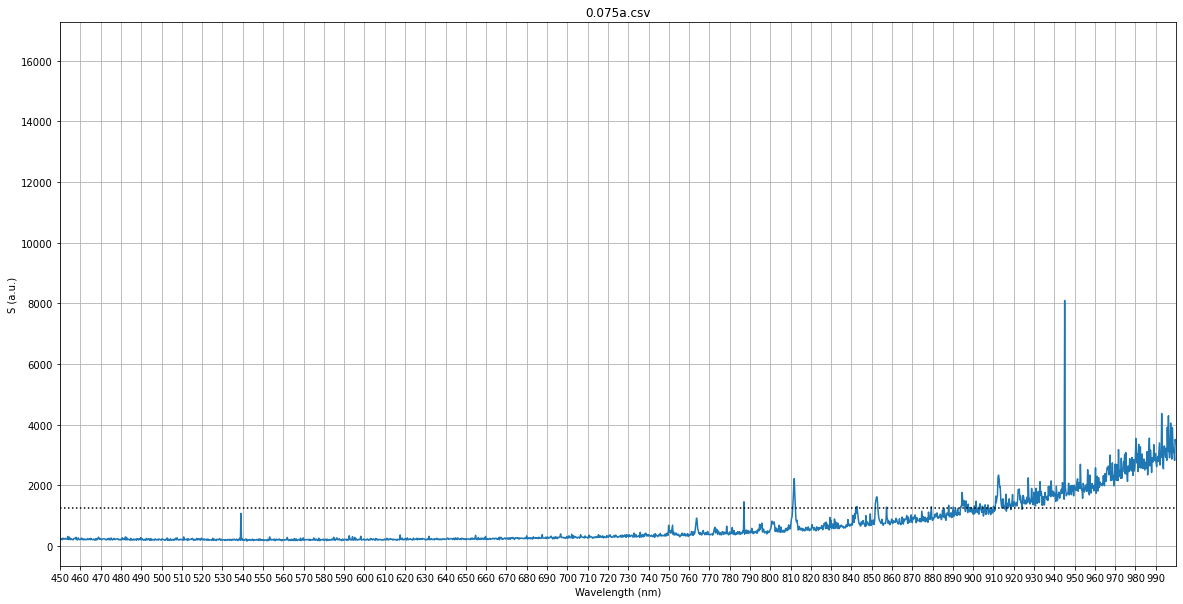

Спектры_Лаба/0.1a.csv
1258.6529205410902


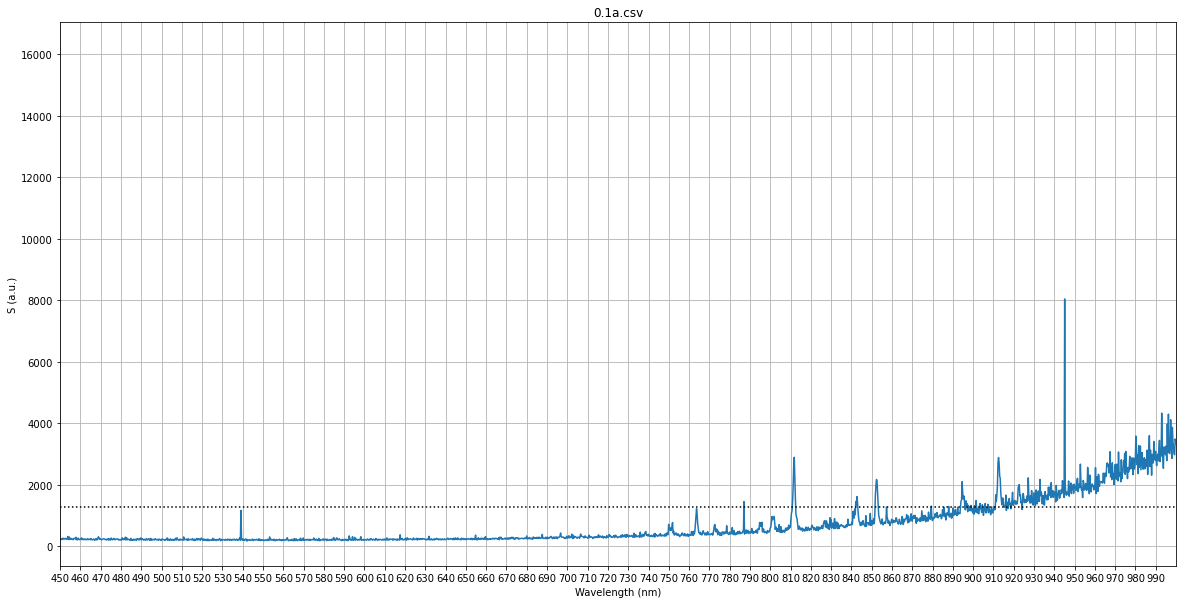

Спектры_Лаба/0.125a.csv
995.6713505447967


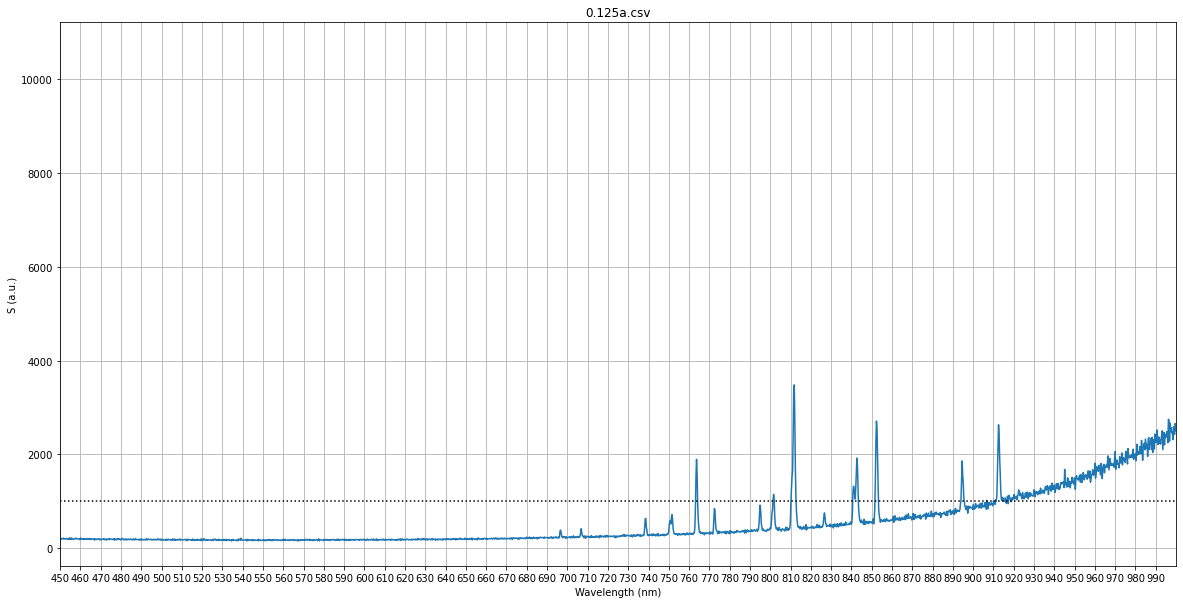

Спектры_Лаба/0.15a.csv
1001.9811506781541


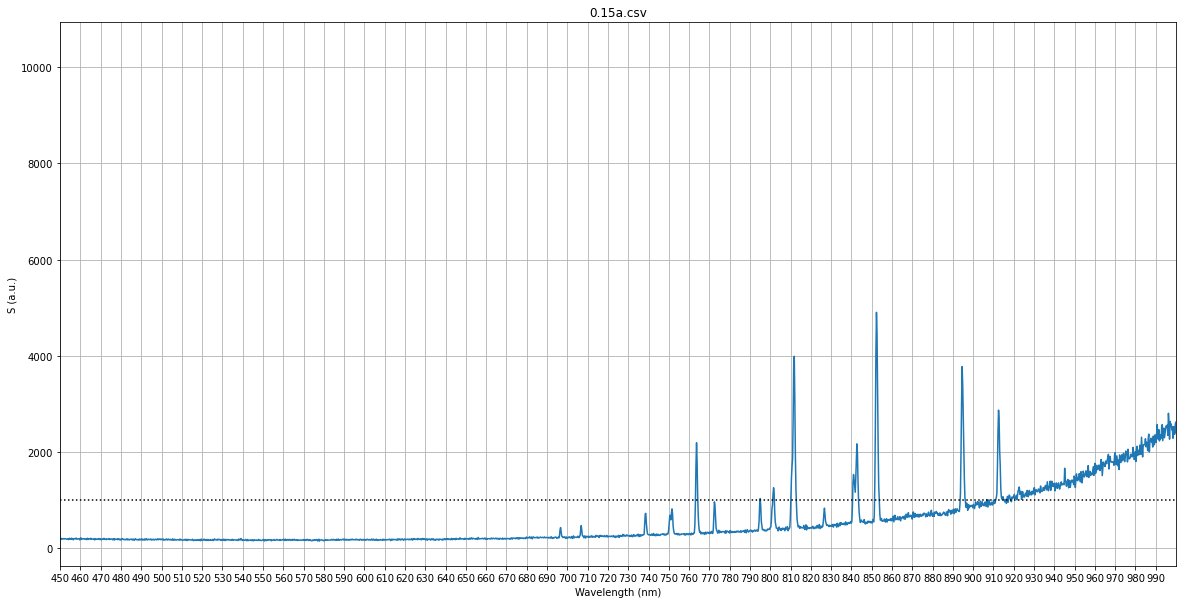

Спектры_Лаба/0.175a.csv
1288.3077295243759


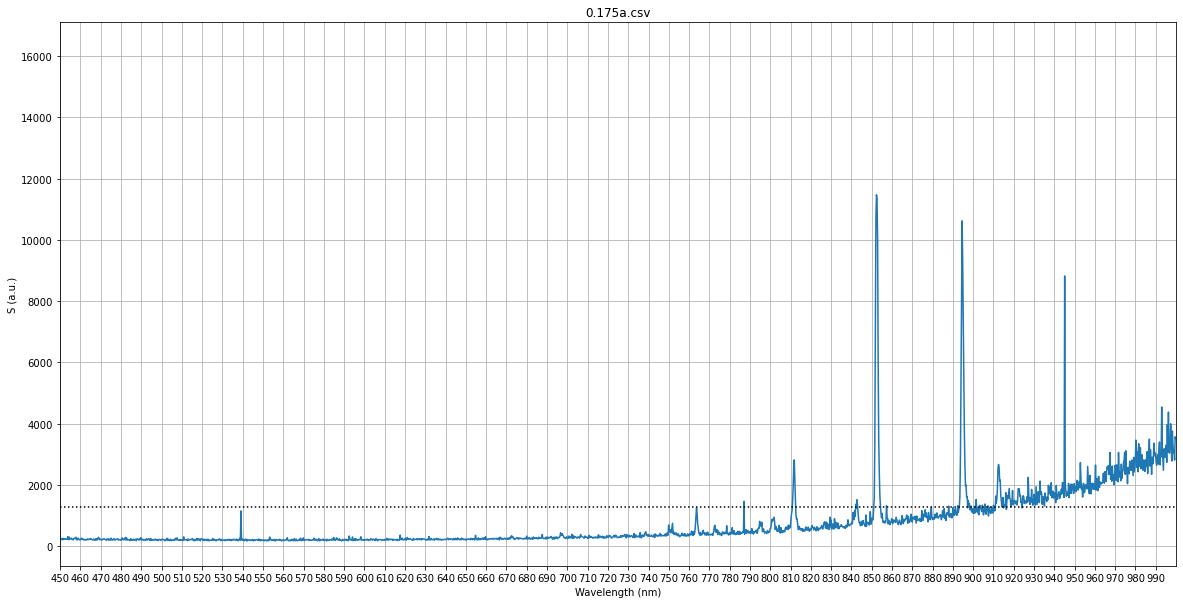

Спектры_Лаба/0.2a.csv
1022.0744141752546


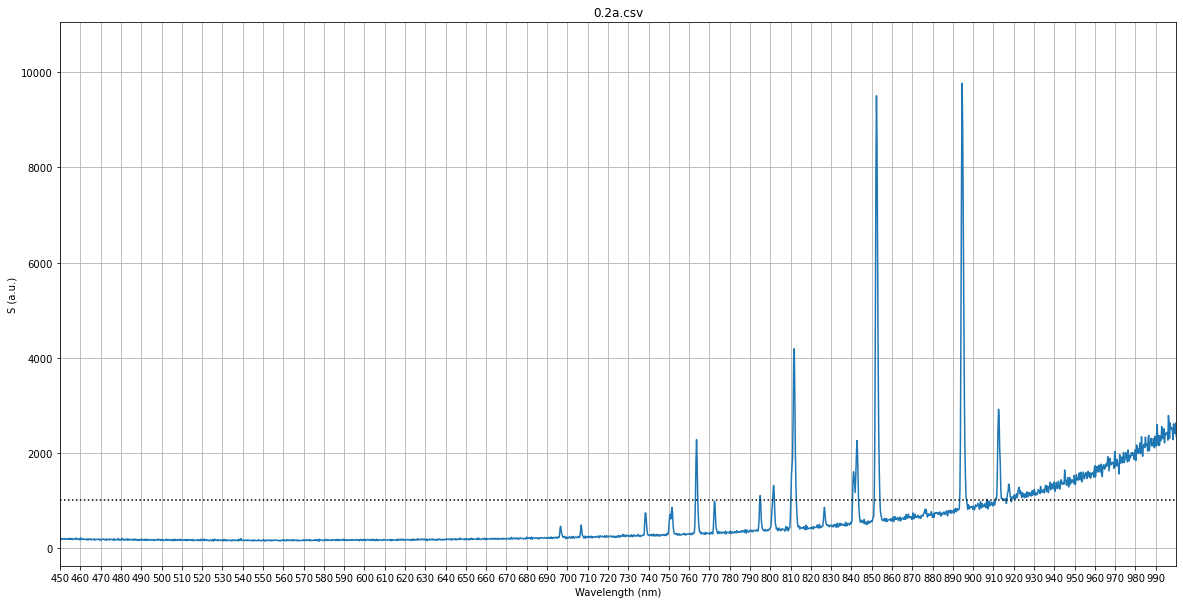

Спектры_Лаба/0.25a.csv
1030.4610242992042


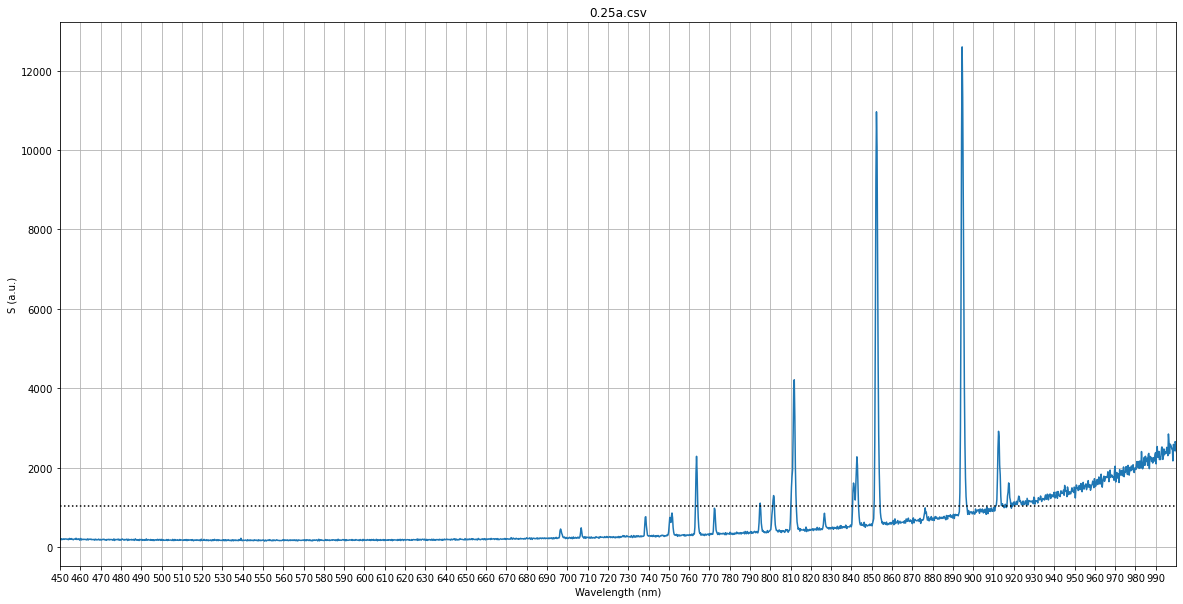

Спектры_Лаба/0.27a.csv
1037.3979161731638


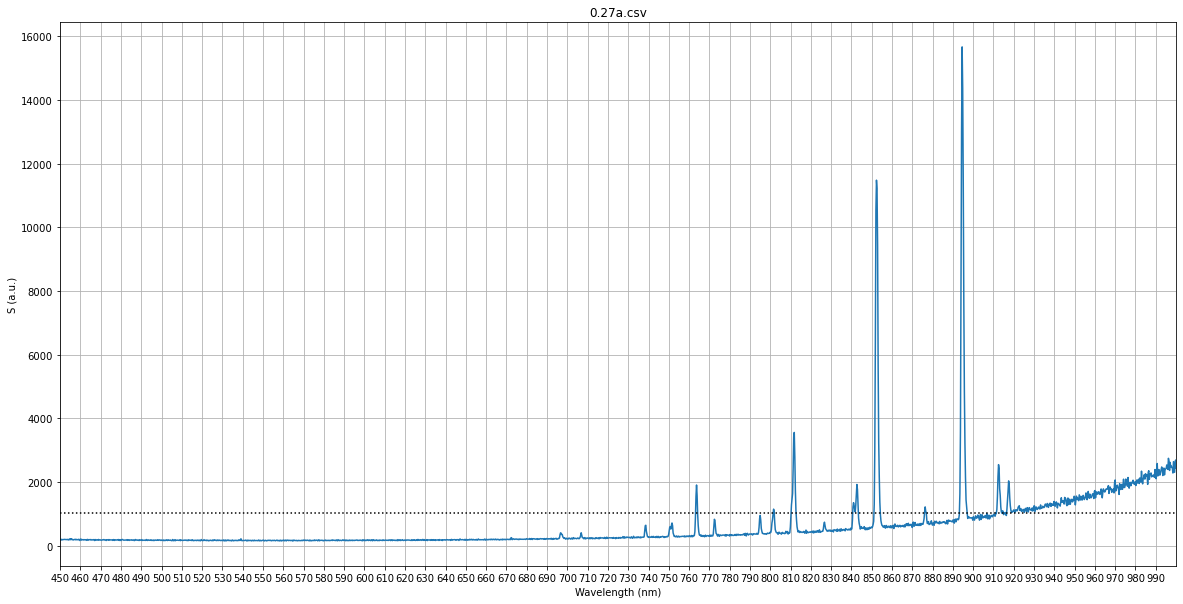

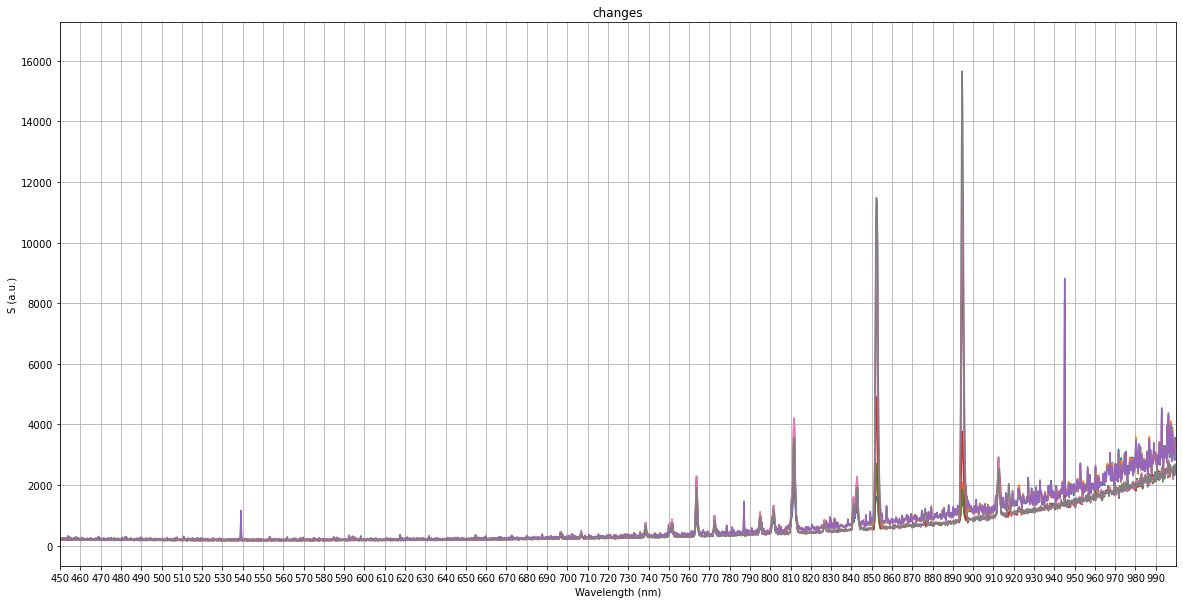

In [28]:
#импорт библиотек для работы
import numpy as np
from matplotlib import pyplot as plt
#files = ['1.DAT', '2.DAT', 'izm 1.DAT', 'izm 2.DAT', 'izm 3.DAT', 'izm 4.DAT', 'izm 5.DAT']
files = ['0.075a.csv', '0.1a.csv', '0.125a.csv', '0.15a.csv', '0.175a.csv', '0.2a.csv', '0.25a.csv', '0.27a.csv']
#открываем файл
waves_changes = []
maxes = []
for file in files:
    
    data = [] #сюда читаем вообще все из файла
    X = []    #здесь будут значения X
    Y = []  #а здесь Y
    print('Спектры_Лаба/' + file)
    with open('Спектры_Лаба/' + file,'r') as f:
        #читаем каждую строку
        for line in f:
            #и в строке слово
            line = line.replace('",', " ")
            line = line.replace('"', '')
            line = line.replace(',', '.')
            i = 0
            l1 = 0
            l2 = 0
            for word in line.split():
                # по очереди записываем в массивы.
                if i == 0:
                    l1 = float(word)
                    i+=1
                else:
                    l2 = float(word)
                    i-=1
                    
            if l1 != 0 and l2 != 0:
                
                l2 = l2 / G[np.where(x>l1)[0][0]]
                
                X.append(l1+4.8)
                Y.append(l2)
            
    #строим график и закрываем файл
    #X = X[700:1400]
    #Y = Y[700:1400]
    
    plt.figure(figsize=(20,10))
    
    
    plt.plot(X, Y)
    plt.grid(True)
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('S (a.u.)')
    plt.title(file)
    plt.xlim(500,1000)
    plt.xticks(np.arange(450, 1000, 10))
    #plt.yticks(np.arange(0, 1, 0.1))
    avr = np.average(Y)
    print(avr)
    plt.axhline(y = avr, color='k', linestyle='dotted')
    plt.savefig(file + '.png') 
    plt.show()
    f.close()
    waves_changes.append(Y)

    
    
    
plt.figure(figsize=(20,10))        
for spectr in waves_changes:
    plt.plot(X, spectr)
plt.grid(True)
plt.xlabel('Wavelength (nm)')
plt.ylabel('S (a.u.)')
plt.title("changes")
plt.xlim(500,1000)
plt.xticks(np.arange(450, 1000, 10))
plt.savefig("spectr" + '.png') 
plt.show()

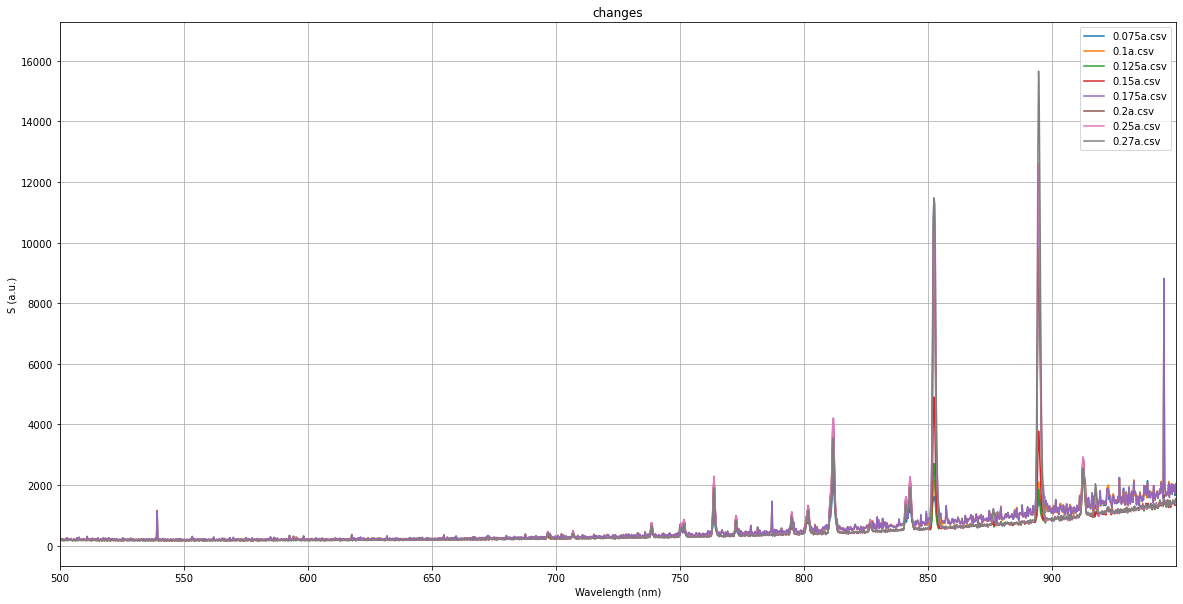

In [29]:


i = 0
plt.figure(figsize=(20,10))        
for spectr in waves_changes:
    plt.plot(X, spectr, label = files[i])
    i+=1
plt.grid(True)
plt.legend()
plt.xlabel('Wavelength (nm)')
plt.ylabel('S (a.u.)')
plt.title("changes")
lim1 = 500
lim2 = 950
plt.xlim(lim1,lim2)
plt.xticks(np.arange(lim1, lim2, 50))
plt.show()

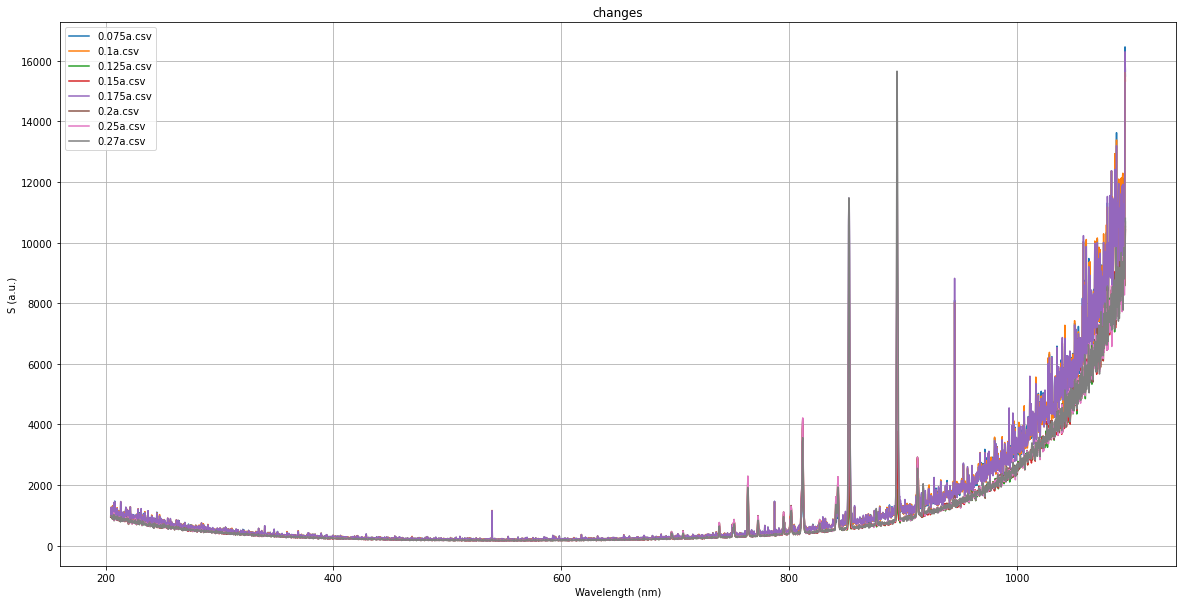

In [30]:


i = 0
plt.figure(figsize=(20,10))        
for spectr in waves_changes:
    plt.plot(X, spectr, label = files[i])
    i+=1
plt.grid(True)
plt.legend()
plt.xlabel('Wavelength (nm)')
plt.ylabel('S (a.u.)')
plt.title("changes")
plt.show()

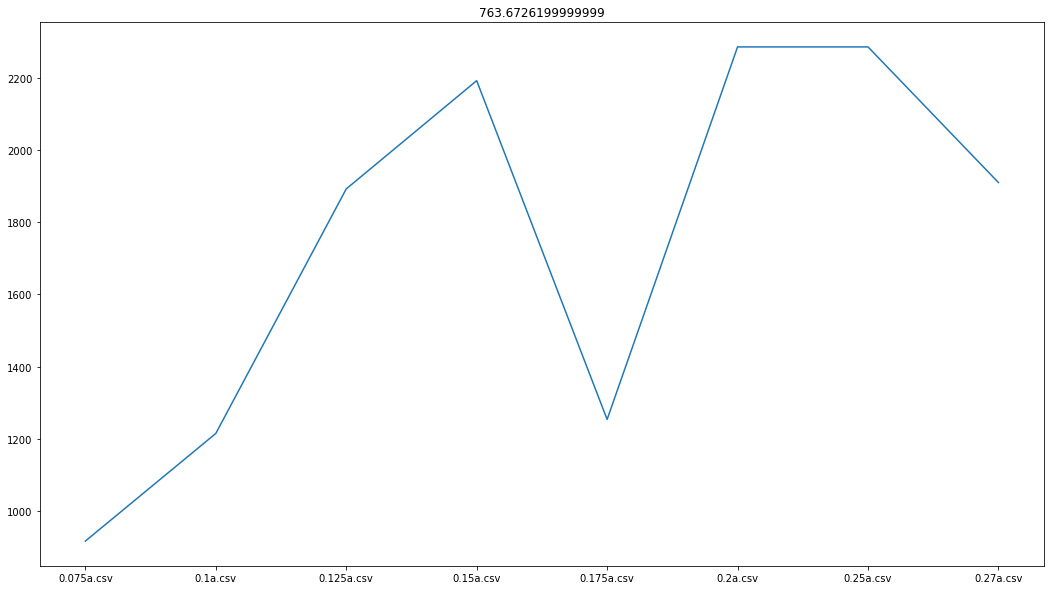

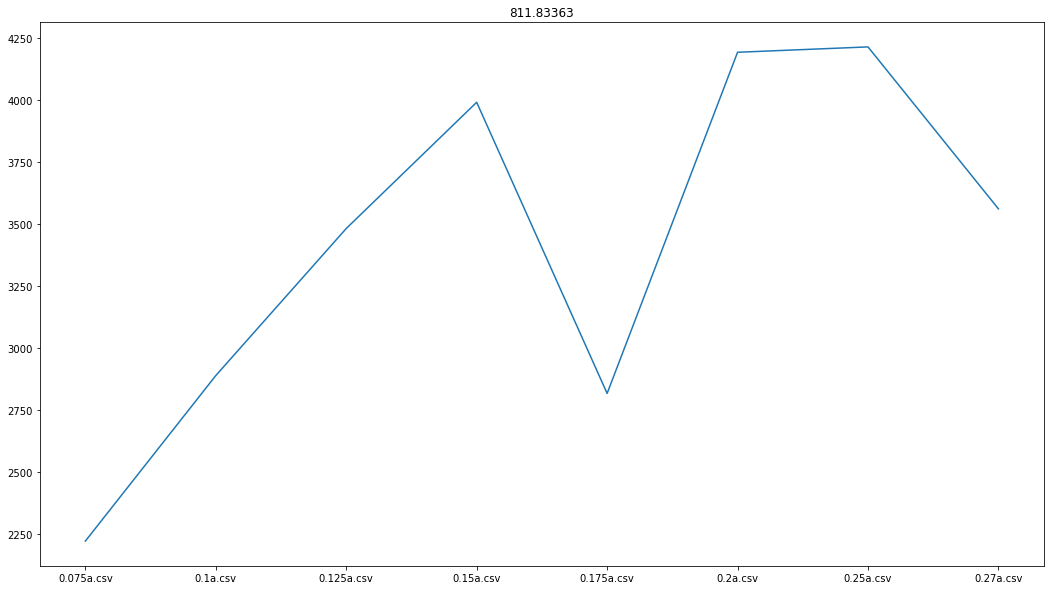

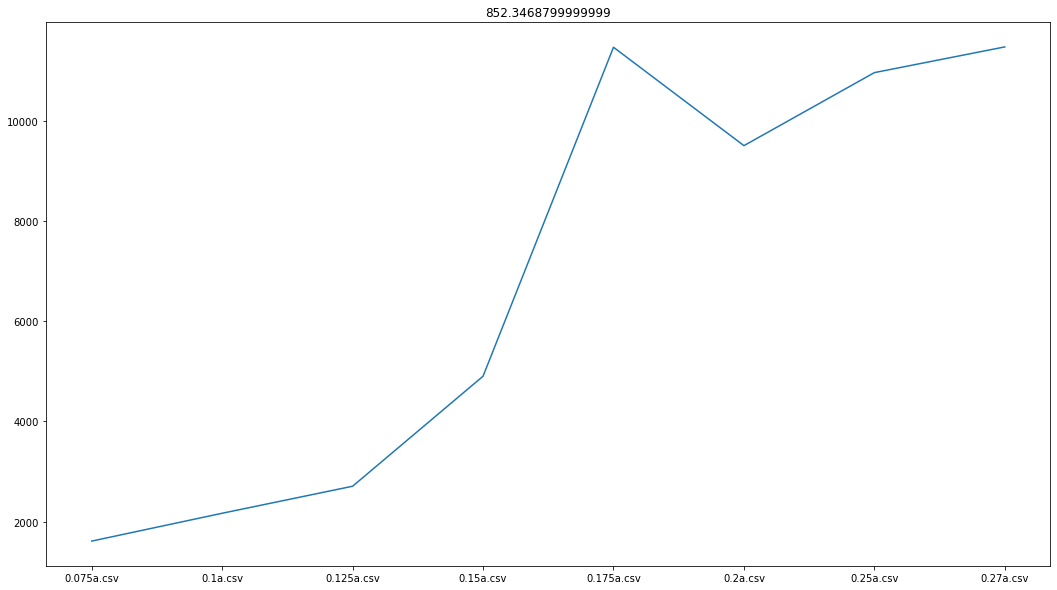

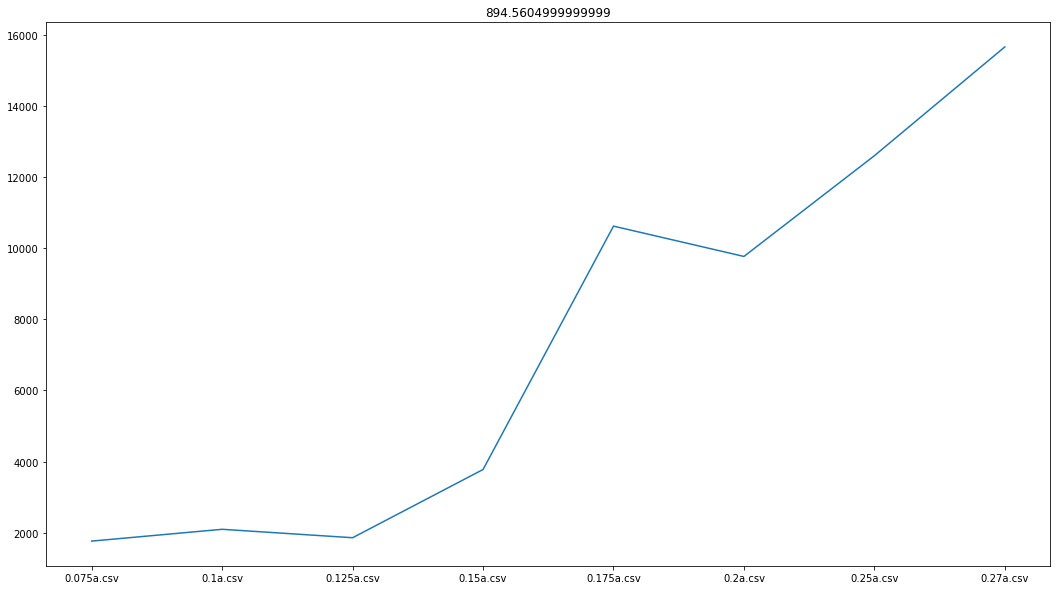

In [31]:
for i in lines:
    line = []
    for spectr in waves_changes:
        line.append(spectr[i])
    
    plt.figure(figsize=(18,10))  
    plt.plot(files, line)
    plt.title(X[i])
    plt.show()

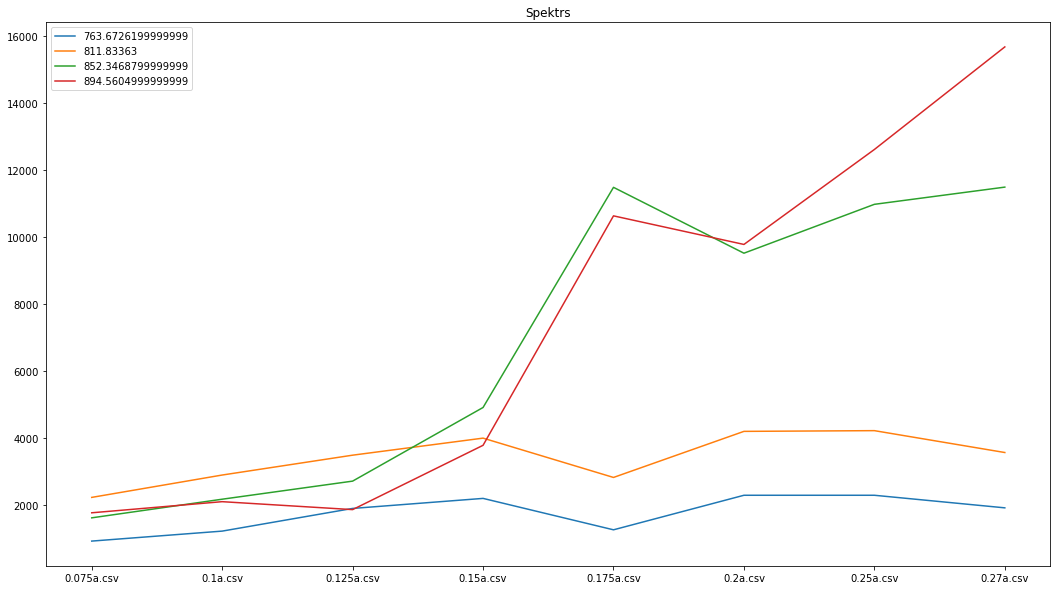

In [32]:

plt.figure(figsize=(18,10))  
for i in lines:
    line = []
    for spectr in waves_changes:
        line.append(spectr[i])
    
    plt.plot(files, line, label=X[i])
plt.title("Spektrs")
plt.legend()
plt.show()